In [1]:
# Importing libraries
import csv
import pandas as pd
import numpy as np
from sklearn import linear_model, svm, preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Reading the datasets
data1 = pd.read_csv('wheat-2013-supervised.csv')
data2 = pd.read_csv('wheat-2014-supervised.csv')

In [3]:
# Merging two datasets
merged = data1.append(data2, ignore_index=True)
merged = merged[["CountyName","State","Latitude","Longitude","Date","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
merged.to_csv('merged.csv', index=None, header=True)

In [4]:
mg = pd.read_csv('merged.csv')
mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","cloudCover","dewPoint","humidity","precipIntensity","precipIntensityMax","precipProbability","precipAccumulation","precipTypeIsRain","precipTypeIsSnow","precipTypeIsOther",	"pressure",	"temperatureMax","temperatureMin","visibility",	"windBearing","windSpeed","NDVI","DayInSeason","Yield" ]]
mg.dropna(inplace=True)
mg = abs(mg)

In [12]:
print (mg.shape)


(359427, 23)


In [25]:
X = mg.iloc[:,0:22]  #independent columns
y = mg.iloc[:,-23]    #target column i.e price range
y=y.astype('int')


In [7]:
# Determining the best features from the data
# Applying SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns


In [8]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                     Specs          Score
18             windBearing  584431.000407
3   apparentTemperatureMin  490523.148008
5                 dewPoint  388245.325492
2   apparentTemperatureMax  379951.701286
16          temperatureMin  372298.742126
15          temperatureMax  290953.292597
0                 Latitude  233754.438546
1                Longitude   97060.962816
20                    NDVI   35048.564785
19               windSpeed   25328.273283


c:\python27\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.47897876 0.09980957 0.0293743  0.03023236 0.03014479 0.03073437
 0.0282732  0.00842512 0.00827309 0.00915986 0.00182215 0.00285161
 0.00156185 0.         0.03354577 0.02985115 0.03064849 0.02483537
 0.03294126 0.03072755 0.02811002 0.02969938]


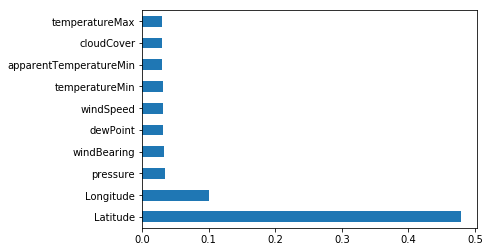

In [9]:
# Verify the results of aboove method by using feature importance method
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [7]:
# mg = mg[["Latitude","Longitude","apparentTemperatureMax","apparentTemperatureMin","dewPoint",	"temperatureMax","temperatureMin",	"windBearing","windSpeed","NDVI","Yield" ]]
mg = mg[1:10000]
X = np.array(mg.drop(["Yield"],1))
y = np.asarray(mg['Yield'],dtype= np.int64)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Applying Decision Tree Classifier with prunning
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2,max_leaf_nodes = 45, 
                             min_samples_leaf = 6 , random_state=1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.411


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeRegressor(max_depth=2, min_samples_split=2,max_leaf_nodes = 6, 
                             min_samples_leaf = 3 , random_state=2)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6763654809693337


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm = LogisticRegression(C=10.0, random_state=0)
model = lm.fit(X_train, y_train)
# cross_val_score(model, X_test, y_test)
model.score(X_test, y_test)


0.5093333333333333

In [26]:
y_train

array([51, 54, 45, ..., 23, 63, 21], dtype=int64)

In [112]:
y_pred = model.predict(X_test)
y_pred,y_test

(array([28.55182785, 26.00582573, 28.06266655, ..., 35.61311432,
        42.54248349, 34.03359896]),
 array([12.7, 14. , 42.4, ..., 27.3, 32.3, 43.8]))

In [19]:
# Code for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0,max_depth=2,min_samples_leaf = 3 ) 
  
# fit the regressor with x and y data 
regressor.fit(X_train, y_train) 
accuracy = regressor.score(X_test, y_test)
print(accuracy)

0.6361491551053441


In [ ]:
#Code for SVM
#clf = svm.SVR(kernel="poly")
#clf.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVC(kernel='linear')
# cross_val_score(clf, X, y)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)